<a href="https://colab.research.google.com/github/snehahampapura/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##Importing the necessary libraries and reading the file

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/datasets/Hotel Bookings.csv')
# df = pd.read_csv('/content/drive/MyDrive/Data/Hotel Bookings.csv')    #Path for Sneha

##Data Exploration

In [ ]:
# First Look
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Checking the percentage of null values present in the dataset
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

####we see that there are 119390 records out of which columns agent and company has the most missing values.

##Data Cleaning

In [ ]:
# Finding Any Null Value Present in the data set
df.isnull().values.any()

True

In [ ]:
# Total Number Of Count Of Null Values Present In The Respective Columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Conclusion -->
        From The Above Observations We Find Some Null Values In The Data are AS Follows
        1. Children -> 4
        2. Country  -> 488
        3. Agent    -> 16340
        4. Company  -> 112593

####After our first look at the dataset, since agent and company columns has the most number of missing values, lets not consider these columns in our analysis. So lets go and drop these columns.

In [ ]:
df.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


####Let us move to further. We can see that arriavl date is not in the correct. So we can create one more column with correct date format

In [ ]:
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('string')
df['arrival_date_month'] = df['arrival_date_month'].astype('string')
df['arrival_date_year'] = df['arrival_date_year'].astype('string')

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [ ]:
df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

####Also convert reservation_status_date into date format

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

####Now let us shift our focus to the very first column in our dataset i.e, is_canceled. As the name suggests this column says if the booking is cancelled or not.

In [ ]:
#Lets us see what all values this column contains
df['is_canceled'].unique()

array([0, 1])

#####Let us consider value 0 as bookings that are not cancelled and 1 as cancelled bookings.

####Let us move to the next column (lead_time). Lead time is the time between booking(reservation) made and the actual arrival. 
Seems interesting isn't it. Let us know more about is column.
Usually lead time is given in days

In [ ]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

#####as we can observe, lead time has the maximun value of 737 and mean of 69 days.
We can say that lead time greater than 200 days is queit unusual.
Nobody books a hotel before 200 days(almost 6 months) earlier

In [ ]:
# find all the lead time above 200
df.loc[df['lead_time']>200,'lead_time']

0         342
1         737
81        368
82        364
85        324
         ... 
119369    207
119370    201
119374    201
119378    247
119389    205
Name: lead_time, Length: 20647, dtype: int64

#####we gave 20647 records out of 119390 where lead time is greater than 200. So Replacing them with median of lead time less than 200.

In [ ]:
df.loc[df['lead_time']>200,'lead_time']=df.loc[df['lead_time']<=200,'lead_time'].median() #Find the index where lead_time >200 and replace the with lead_time<200
df['lead_time'] = df['lead_time'].astype('int')                                           #After replacing the data tyoe is chaged to float. change it back to int again

In [ ]:
type(df['lead_time'][0])

numpy.int64

####Moving forward we can create one more column to calculate total stay of guests by adding stay_in_weekend_nights and stay_in_week_nights

In [ ]:
df['stay_duration']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df['stay_duration'].value_counts()

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
28       35
18       35
19       22
17       20
22       14
29       14
20       14
30       13
23        8
26        6
24        6
27        5
35        5
42        4
33        3
56        2
57        1
34        1
38        1
43        1
69        1
45        1
46        1
48        1
49        1
60        1
Name: stay_duration, dtype: int64

#####Stay duration 0 means that the guests didn't stay in the night.
This does not indicate absurd data

####Lets move on to days_in_waiting_list column. As the name suggests this column has the number of days the booking was kept in waiting list before it was confirmed by the hotel.

In [ ]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

#####Since we replace lead_time <200, now it makes no sense if the days in waiting list column has data greater than 200 
(we dont have bookings made before 200 days of arrival, so waiting time cant be more than 200 days)

In [ ]:
df.loc[df['days_in_waiting_list']<=200,'days_in_waiting_list'].median()

0.0

In [ ]:
df.loc[df['days_in_waiting_list']>200,'days_in_waiting_list'] = df.loc[df['days_in_waiting_list']<=200,'days_in_waiting_list'].median() #Find the index where days_in_waiting_list >200 and replace the with days_in_waiting_list<200                   
                                                                   #After replacing, the data type is chaged to float. change it back to int again

In [ ]:
df['days_in_waiting_list'] = df['days_in_waiting_list'].astype('int')

In [ ]:
type(df['days_in_waiting_list'][0])

numpy.longlong

####Lets understand about the adr column
ADR means the average daily revenue (daily revenue the hotel manages to collect from all the rooms on an average)

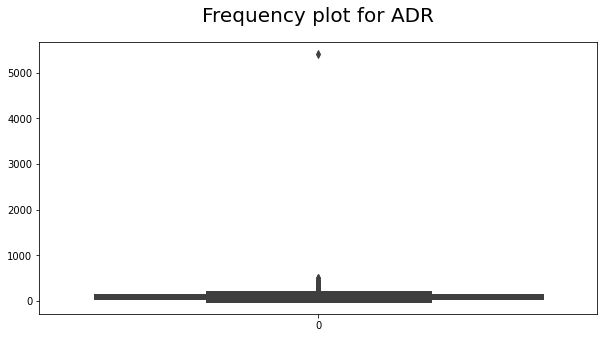

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Frequency plot for ADR",fontsize=20,pad=20)
sns.boxplot(data = df['adr'],linewidth=3)
plt.show()

#####we can see that there are outliers far away from the mean value (above 5000)

#####There is one resort hotel that is having negative adr.
Hotel that is running in loss

In [ ]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,10


#####We can consider values above 1000 and below 0 as outliers from the above plot

In [ ]:
outliers_index = list(df[(df['adr']>1000) | (df['adr']<0)].index)    #Finding all the outlier index
outliers_index

[14969, 48515]

In [ ]:
df.drop(outliers_index,axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119388 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119388 non-null  object        
 1   is_canceled                     119388 non-null  int64         
 2   lead_time                       119388 non-null  int64         
 3   arrival_date_year               119388 non-null  string        
 4   arrival_date_month              119388 non-null  string        
 5   arrival_date_week_number        119388 non-null  int64         
 6   arrival_date_day_of_month       119388 non-null  string        
 7   stays_in_weekend_nights         119388 non-null  int64         
 8   stays_in_week_nights            119388 non-null  int64         
 9   adults                          119388 non-null  int64         
 10  children                        119384 non-null  float64

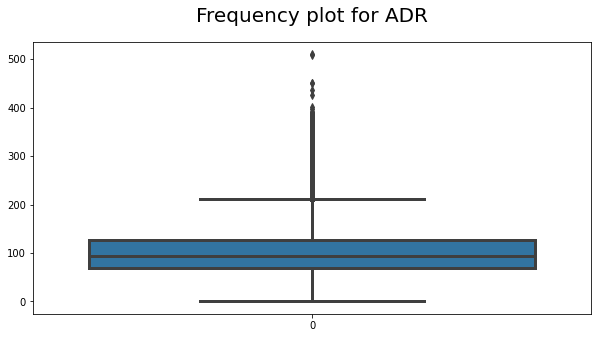

In [ ]:
plt.figure(figsize=(10,5)) #Need to analyse further
plt.title("Frequency plot for ADR",fontsize=20,pad=20)
sns.boxplot(data = df['adr'],linewidth=3)
plt.show()

####Moving on to customer_type, market_segment, distribution_channel,is_repeated_guest

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['is_repeated_guest'].unique()

array([0, 1])

#####As there are no null values in these columns, there is no need to manipulate these columns

####Lets us move to the column country now

This indicates the location of the resort.

Since there are less null values in this column,we can drop the null records

In [ ]:
country_null_index = list(df.loc[df['country'].isnull()].index) #= df.loc[df['booking_changes']<10,'booking_changes'].median() 

In [ ]:
## dropping countries with null values
df.drop(country_null_index,axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118900 non-null  object        
 1   is_canceled                     118900 non-null  int64         
 2   lead_time                       118900 non-null  int64         
 3   arrival_date_year               118900 non-null  string        
 4   arrival_date_month              118900 non-null  string        
 5   arrival_date_week_number        118900 non-null  int64         
 6   arrival_date_day_of_month       118900 non-null  string        
 7   stays_in_weekend_nights         118900 non-null  int64         
 8   stays_in_week_nights            118900 non-null  int64         
 9   adults                          118900 non-null  int64         
 10  children                        118896 non-null  float64

####Moving on to booking_changes column

In [ ]:
df.loc[df['booking_changes']>=10,'booking_changes'] = df.loc[df['booking_changes']<10,'booking_changes'].median()    ## replcaing booking changes more than 10 with median value

In [ ]:
df['booking_changes'] = df['booking_changes'].astype('int')

In [ ]:
df['booking_changes'].value_counts()

0    100936
1     12638
2      3789
3       925
4       375
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64